# Presentación del caso

El departamento de recursos humanos de Salifort Motors quiere mejorar la satisfacción de sus empleados. Para ello, han recogido datos mediante una encuesta y ahora, es trabajo del departamento de datos trabajar con lo que han obtenido.

La pregunta a responder en este proyecto es: ¿Qué hace a un empleado dejar la compañía?

Los datos utilizados en este proyecto provienen de [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

**Background de la empresa**

Salifort Motors es una empresa ficticia francesa que se dedica a la manufactura de vehículos de energías alternativas. Su fuerza laboral global de más de 100.000 empleados investiga, diseña, construye, valida y distribuye vehículos eléctricos, solares, de algas y de hidrógeno.

## Comienza el análisis

Para empezar, importaremos todas las librerías y paquetes que necesitaremos a lo largo del proyecto.





In [3]:
# Paquetes de manipulación de datos
import numpy as np
import pandas as pd

# Paquetes de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Paquetes para las métricas
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, \
confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

# Paquetes para modelado de datos
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.ensemble import RandomForestClassifier

In [12]:
# Importa el conjunto de datos
df0 = pd.read_csv("HR_comma_sep.csv")

# Observa las primeras filas del dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Análisis exploratorio inicial y limpieza de datos

In [13]:
# Recolecta información básica de los datos
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [14]:
# Recolecta estadísticas descriptivas
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


A continuación renonmbraremos las columnas, todo pasará a estar en snake_case, se corregirán los errores de escritura y se cambiará algún nombre para que sea más conciso.

In [15]:
# Muestra los nombres de las columnas
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [18]:
# Renombra las columnas
df0 = df0.rename(columns={"average_montly_hours":"average_monthly_hours", "Work_accident":"work_accident",
                    "Department":"department", "time_spend_company":"tenure"})

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

Lo siguiente será buscar valores faltantes, duplicados y valores atípicos.

In [19]:
# Comprueba valores faltantes
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [21]:
# Comprueba valores duplicados
df0.duplicated().sum()

3008

In [22]:
# Inspecciona filas con valores duplicados
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [23]:
# Borra las filas con valores duplicados y guarda el resultado en un nuevo dataframe
df1 = df0.drop_duplicates(keep = "first")

# Muestra las primeras filas del nuevo dataframe
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Valores atípicos

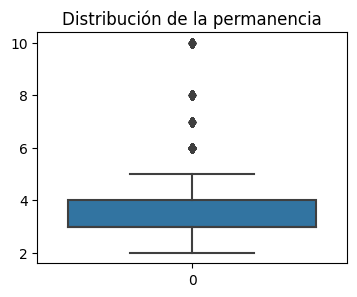

In [32]:
# Crea un gráfico de caja para visualizar la distribución de "tenure" (permanencia) y detectar posibles valores atípicos
plt.figure(figsize=(4,3))
sns.boxplot(data = df1["tenure"])
plt.title("Distribución de la permanencia")
plt.show()

In [34]:
# Determina el número de filas que contienen valores atípicos

# Percentil 25
percentil25 = df1["tenure"].quantile(0.25)

# Percentil 75
percentil75 = df1["tenure"].quantile(0.75)

iqr = percentil75 - percentil25

# Define el límite superior e inferior para los valores atípicos
lower_limit = percentil25 - 1.5 * iqr
upper_limit = percentil75 + 1.5 * iqr

print("Límite inferior:", lower_limit)
print("Límite superior:", upper_limit)

# Identifica los valores atípicos en la variable tenure
outliers = df1[(df1["tenure"] < lower_limit) | (df1["tenure"] > upper_limit)]

# Cuenta el número de filas que contienen valores atípicos en tenure
print("Número de filas que contienen valores atípicos en ""tenure"":", len(outliers))

Límite inferior: 1.5
Límite superior: 5.5
Número de filas que contienen valores atípicos en tenure: 824


Algunos modelos son más sensibles a los valores atípicos que otros. Dependiendo del modelo que escojamos decidiremos si borrar los valores atípicos o no.

Seguimos con el análisis exploratorio de datos, averiguando cuántos empleados se han ido y cuál es el porcentaje.

In [35]:
# Averigua el número de gente que se fue vs los que se quedaron
print(df1["left"].value_counts())
print()

# Consigue el porcentaje de empleados que se fueron vs se quedaron
print(df1["left"].value_counts(normalize=True)*100)

0    10000
1     1991
Name: left, dtype: int64

0    83.39588
1    16.60412
Name: left, dtype: float64


## Visualizaciones

El siguiente paso será examinar diferentes variables con visualizaciones.

Comenzaremos creando un gráfico de cajas agrupado que nos muestre la distribución de la media de horas mensuales trabajadas por número de proyectos, comparando las distribuciones de los empleados que se fueron y se quedaron.

También crearemos un histograma con el número de proyectos comparando también los empleados que se fueron y se quedaron.

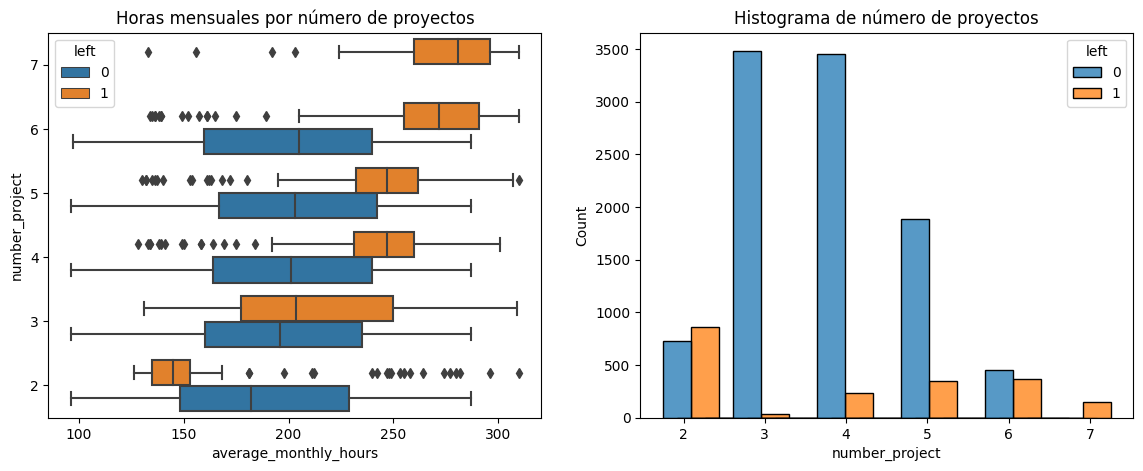

In [45]:
fig, ax = plt.subplots(1, 2, figsize = (14,5))

sns.boxplot(data = df1, x = "average_monthly_hours", y = "number_project", hue = "left", orient = "h", ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_title("Horas mensuales por número de proyectos", fontsize = 12)

sns.histplot(data = df1, x = "number_project", hue = "left", multiple = "dodge", shrink = 4, ax = ax[1])
ax[1].set_title("Histograma de número de proyectos", fontsize = 12)

plt.show()

En el gráfico de caja podemos observar que los empleados que se fueron se mueven en loa rangos más altos de horas mensuales trabajadas y de número de proyectos.
El histograma con el número de proyectos varía un poco más y está un poco más igualado.
En ambos gráficos se puede observar que todos los empleados con 7 proyectos se marcharon de la empresa.

Otra variable interesante a observar es el salario.

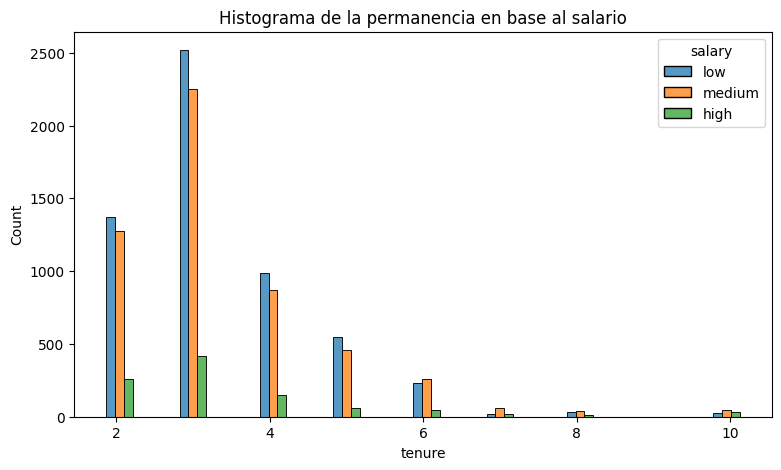

In [48]:
plt.figure(figsize = (9,5))

sns.histplot(data = df1, x = "tenure", hue = "salary", multiple = "dodge", shrink = 4)
plt.title("Histograma de la permanencia en base al salario", fontsize = 12)

plt.show()

Los empleados con sueldos más bajos tienen menos permanencia en la empresa.

Lo siguiente será observar si hay correlación entre trabajar más horas y tener mejor puntuación en la evaluación. Para ello, utilizaremos un gráfico de dispersión.

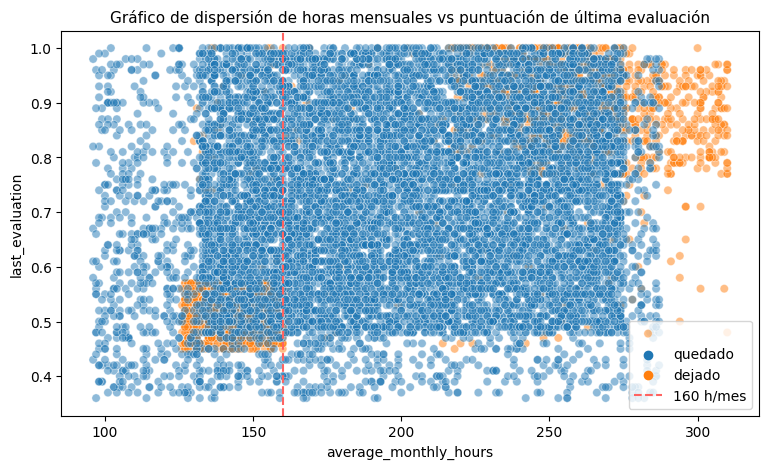

In [60]:
plt.figure(figsize = (9,5))

sns.scatterplot(data = df1, x = "average_monthly_hours", y = "last_evaluation", hue = "left", alpha = 0.5)
plt.axvline(x = 160, color = "#ff6361", ls = "--")
plt.legend(labels = ["", "quedado", "dejado", "160 h/mes"])
plt.title("Gráfico de dispersión de horas mensuales vs puntuación de última evaluación", fontsize = 11)

plt.show()

El gráfico nos señala dos grupos de trabajadores que se han ido: un grupo de trabajadores con una baja puntuaciñon y con menos de las 160 horas normalmente trabajadas al mes, y otro grupo con buena puntuación y con un mayor número de horas trabajadas al mes, más de 250 horas. Por lo que parece haber una correlación entre estas dos variables.

El siguiente gráfico que crearemos será para averiguar la relación entre las horas mensuales trabajadas y los ascensos en los últimos cinco años.

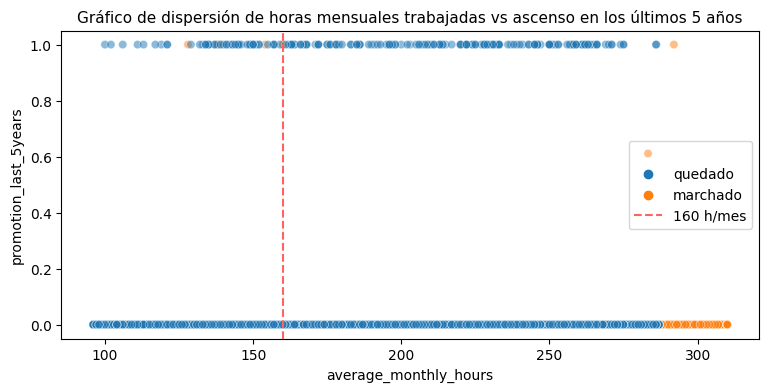

In [59]:
plt.figure(figsize = (9,4))

sns.scatterplot(data = df1, x = "average_monthly_hours", y = "promotion_last_5years", hue = "left", alpha = 0.5)
plt.axvline(x = 160, color = "#ff6361", label = "h/mes", ls = "--")
plt.legend(labels = ["", "quedado", "marchado", "160 h/mes"])
plt.title("Gráfico de dispersión de horas mensuales trabajadas vs ascenso en los últimos 5 años", fontsize = 11)

plt.show()

El uno representa un ascenso, por lo que se observa que la mayoría de los empleados que han sido ascendidos en los últimos cinco años se han quedado en la empresa. También se observa que todos los que se han marchado son los que más horas han trabajado.

A continuación averiguaremos cómo están distribuidos en los departamentos los empleados que se han marchado.

In [61]:
# Muestra el número de empleados por departamento
df1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

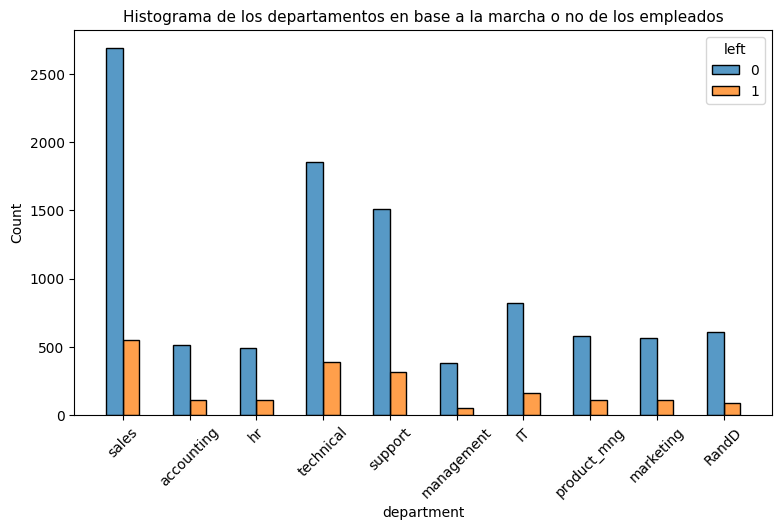

In [66]:
plt.figure(figsize = (9,5))

sns.histplot(data = df1, x = "department", hue = "left", multiple = "dodge", shrink = 0.5)
plt.xticks(rotation = 45)
plt.title("Histograma de los departamentos en base a la marcha o no de los empleados", fontsize = 11)

plt.show()

En proporción, no parece que difieran mucho los empleados que se fueron en base a los departamentos.

Por último, buscaremos correlaciones fuertes entre las variables.

<ipython-input-72-1c361aaa358d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), vmin = -1, vmax = 1, annot = True, cmap = sns.color_palette("vlag", as_cmap = True))


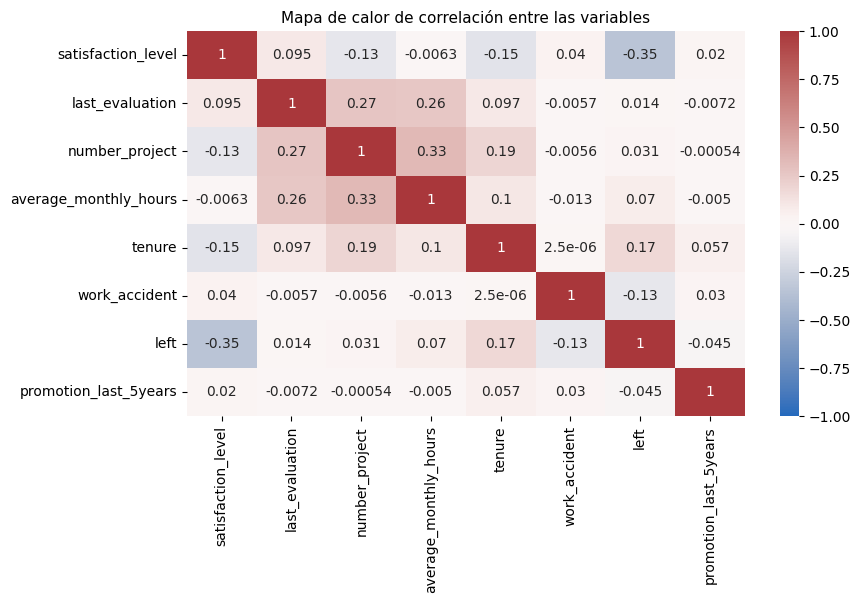

In [72]:
plt.figure(figsize = (9,5))

sns.heatmap(df1.corr(), vmin = -1, vmax = 1, annot = True, cmap = sns.color_palette("vlag", as_cmap = True))
plt.title("Mapa de calor de correlación entre las variables", fontsize = 11)

plt.show()

El mapa de calor de correlación confirma que la cantidad de proyectos, las horas mensuales y las puntaciones de evaluación tienen alguna correlación positiva entre sí, y si un empleado se va está correlacionado negativamente con su nivel de satisfacción.

## Conclusiones

Parece que los empleados que se van trabajan una gran cantidad de horas, hacen muchos proyectos y tienen un nivel bajo de satisfacción. Es comprensible pensar que muchos de ellos acaben agotados por las grandes cantidades de trabajo y dejen su empleo por ello. Se debería mejorar la gestión para que los trabajadores no superen un cierto número de horas trabajadas y proyectos.

## Creación del modelo

Nuestro modelo debe responder a la pregunta de ¿qué hace que un empleado se vaya de la empresa?. Es decir debemos averiguar qué variables afectan a nuestra variable resultado que es "left". Esta variable indica 1 si el empleado se ha ido y 0 si se ha quedado.

Es una variable categórica las dos mejores opciones serían un modelo de regresión logístico o un modelo con árboles de decisión.

En este caso nos hemos decantado por un **random forest** o bosque aleatorio. Es un modelo robusto ante los valores atípicos, por lo que no tendremos que preocuparnos por ellos.

In [74]:
# Codifica las variables categóricas a numéricas
df_enc = df1.copy()

# Codifica la variable "salary"
df_enc["salary"] = df_enc["salary"].astype("category").cat.set_categories(["low","medium","high"]).cat.codes

# Codifica la variable "department"
df_enc = pd.get_dummies(df_enc, drop_first = False)

df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [75]:
# Aísla la variable a predecir
y = df_enc["left"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [76]:
# Selecciona las variables explicativas
X = df_enc.drop("left", axis = 1)

X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [77]:
# Separa en grupos de entrenamiento y de prueba
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

In [78]:
# Separa en grupos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size = 0.25, random_state = 0)

In [80]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((7194, 18), (2398, 18), (2399, 18), (7194,), (2398,), (2399,))

Ahora que ya hemos separado los datos en sets de entrenamiento, validación y test, crearemos el modelo.

In [81]:
# Inicia el modelo
rf = RandomForestClassifier(random_state = 0)

# Crea un diccionario para los hiperparámetros
cv_params = {"max_depth": [3,5,None],
             "max_features": [1.0],
             "max_samples": [0.7, 1.0],
             "min_samples_leaf": [1,2,3],
             "min_samples_split": [2,3,4],
             "n_estimators": [300, 500]}

# Crea un diccionario para las métricas de scoring
scoring = {"precision", "accuracy", "recall", "f1"}

# Inicia GridSearchCV

rf_cv = GridSearchCV(rf, cv_params, scoring = scoring, cv = 5, refit = "f1")

In [82]:
%%time

rf_cv.fit(X_train, y_train)

CPU times: user 33min 18s, sys: 4.95 s, total: 33min 23s
Wall time: 36min 54s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='f1', scoring={'f1', 'precision', 'recall', 'accuracy'})

In [83]:
rf_cv.best_score_

0.9502260605228825

In [84]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [85]:
# Haz la predicción con los datos de validación
y_pred = rf_cv.best_estimator_.predict(X_val)

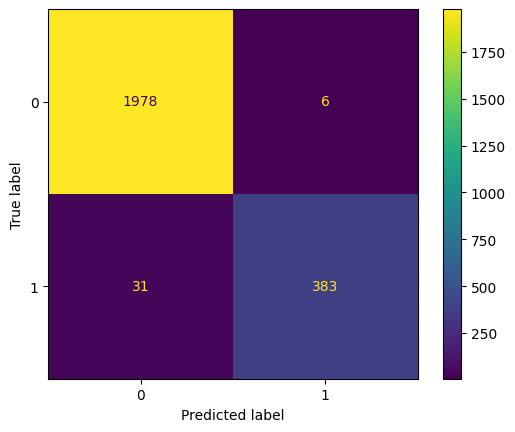

In [88]:
# Crea una matriz de confusión
cm = confusion_matrix(y_val, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_cv.classes_)

disp.plot()

plt.show()

La parte izquierda y arriba representa los verdaderos negativos, arriba a la derecha los falsos positivos. Abajo a la izquierda los falsos negativos y abajo a la derecha los verdaderos positivos.

*   Verdaderos negativos: la cantidad de personas que no se fueron que el modelo predijo con precisión no se fueron.

*   Falsos positivos: el número de personas que no abandonaron y el modelo predijo incorrectamente que lo harían.

*   Falsos negativos: la cantidad de personas que se fueron y que el modelo predijo incorrectamente que no se fueron

*   Verdaderos aspectos positivos: la cantidad de personas que abandonaron y el modelo predijo con precisión que sí abandonaron.

In [89]:
# Crea un classification report
target_labels = ["left", "stay"]

print(classification_report(y_val, y_pred, target_names = target_labels))

              precision    recall  f1-score   support

        left       0.98      1.00      0.99      1984
        stay       0.98      0.93      0.95       414

    accuracy                           0.98      2398
   macro avg       0.98      0.96      0.97      2398
weighted avg       0.98      0.98      0.98      2398



A continuación crearemos un modelo con XGBoost y decidiremos cuál de los dos usar con el set de datos para testear.

In [90]:
# Inicia el XGBoost
xgb = XGBClassifier("binary:logistic", random_state = 0)

# Crea un diccionario con los hiperparámetros

cv_param_xgb = {"max_depth": [4,8,12],
                "min_child_weight": [3, 5],
                "learning_rate": [0.01, 0.1],
                "n_estimators": [300, 500]}

scoring = {"precision", "accuracy", "recall", "f1"}

# Inicia el GridSearchCV
xgb_cv = GridSearchCV(xgb, cv_param_xgb, cv = 5, refit = "f1")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


In [91]:
%%time

xgb_cv.fit(X_train, y_train)

CPU times: user 2min 30s, sys: 1.9 s, total: 2min 32s
Wall time: 1min 56s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='f1')

In [92]:
xgb_cv.best_score_

0.9817907854028596

In [93]:
xgb_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 12,
 'min_child_weight': 3,
 'n_estimators': 500}

In [94]:
y_pred_xgb = xgb_cv.best_estimator_.predict(X_val)

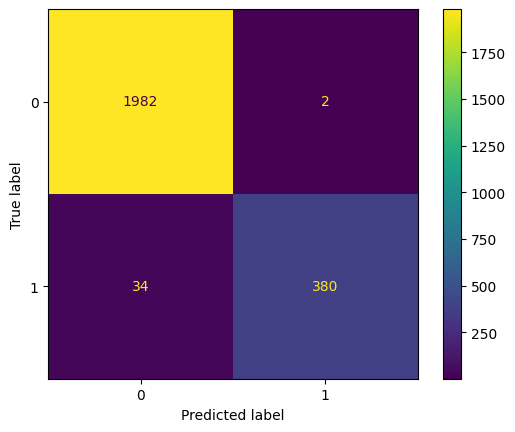

In [96]:
# Crea una matriz de confusión
cm1 = confusion_matrix(y_val, y_pred_xgb)

disp1 = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = xgb_cv.classes_)

disp1.plot()

plt.show()

In [ ]:
print(classification_report(y_val, y_pred_xgb, target_names = target_labels))

Ambos modelos tienen buenos números, pero nos quedaremos con el random forest, ya que en la matriz de dispersión se observa un menor número de falsos negativos.

In [97]:
# Usa el modelo ganador, random forest, para predecir con los datos de testeo
y_pred_final = rf_cv.best_estimator_.predict(X_test)

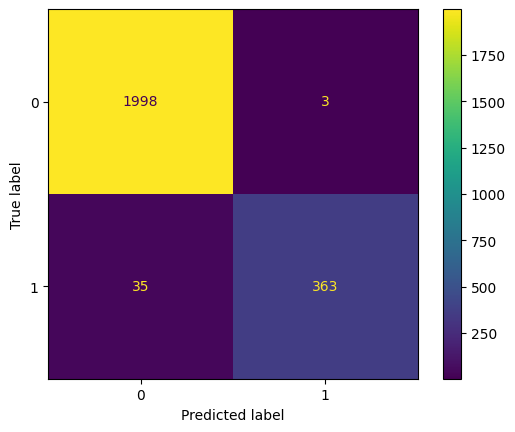

In [98]:
# Crea una matriz de confusión
cm2 = confusion_matrix(y_test, y_pred_final)

disp2 = ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels = rf_cv.classes_)

disp2.plot()

plt.show()

El modelo predice mayor número de falsos negativos que positivos, pero igualmente es un modelo robusto.

In [99]:
# Crea un dataframe para la importancia de las variables explicativas
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.DataFrame(importances, columns = ["importance"], index = X_test.columns)

rf_importances = rf_importances.sort_values(by = "importance", ascending = False)
rf_importances

,importance
satisfaction_level,0.478662
number_project,0.143531
last_evaluation,0.131839
tenure,0.121094
average_monthly_hours,0.105048
salary,0.003419
department_technical,0.002707
department_support,0.002421
department_sales,0.002306
department_IT,0.001559


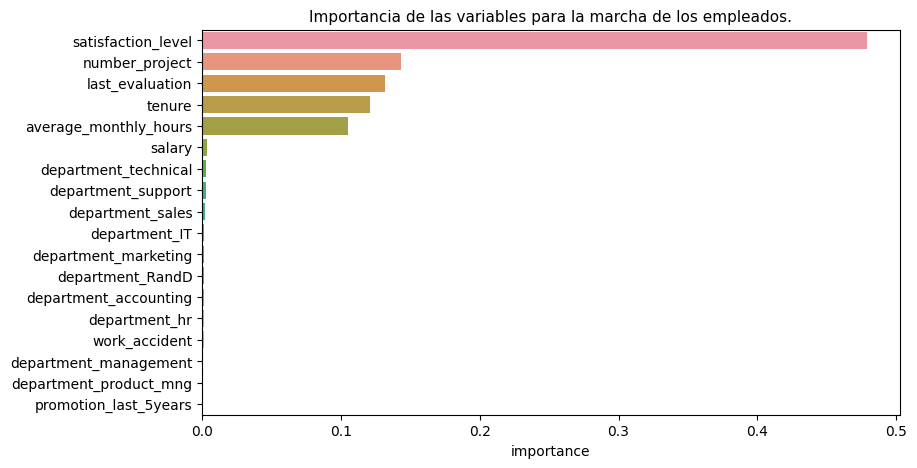

In [100]:
# Crea un gráfico de barras para visualizar la importancia de las variables
plt.figure(figsize = (9,5))

sns.barplot(data = rf_importances, x = "importance", y = rf_importances.index)
plt.title("Importancia de las variables para la marcha de los empleados.", fontsize = 11)

plt.show()

Las variables con mayor poder explicativo en el modelo son el nivel de satisfacción, el número de proyectos, la última evaluación y la permanencia.



## Conclusión y recomendaciones.

El modelo concluye que los trabajadores están sobrecargados de trabajo.

Para mantener a los empleados se recomienda lo siguiente:

*   Limitar el número de proyectos por empleado.

*   Considerar ascensos cuando los empleados lleven más de cuatro años en la empresa o investigar la baja satisfacción de estos

*   Limitar el número de horas trabajadas o recompensarlas debidamente.

*   No deberían tener mejor puntuación los trabajadores que más horas hagan. Se debería medir de otra manera el buen trabajo de los empleados, ya que más horas no implica un mejor trabajo.



